# Introduction to Deep Learning. 

We move from classic classifiers to deep learning based architectures. In this practical session we will cover:
- How to implement a simple neural network using PyTorch.
- How to train a neural network and check different optimization strategies.
- Review the concept of overfitting and how to avoid it using regularization techniques.


In [2]:
# Let's start by importing torch (you might need to pip install if you haven't already)
import torch 
from torchvision import transforms, datasets
from torch.utils.data import DataLoader

# Get the MNIST dataset
# Set up the data preprocessing and loading:
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))
])  # transform the data to torch tensor and normalize
train_dataset = datasets.MNIST(root='./data', train=True, download=True, transform=transform)
test_dataset = datasets.MNIST(root='./data', train=False, download=True, transform=transform)

# Now let's split the training set into a training and validation set
generator = torch.Generator().manual_seed(42)  # just a random generator
train_dataset, val_dataset = torch.utils.data.random_split(train_dataset, [50000, 10000], generator=generator)

print('We loaded {} training, {} validation, and {} testing samples'.format(len(train_dataset), len(val_dataset), len(test_dataset)))

# Set up the data loaders (they are iterable objects that return the data in batches)
train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=64, shuffle=False)
test_loader = DataLoader(test_dataset, batch_size=64, shuffle=False)

We loaded 50000 training, 10000 validation, and 10000 testing samples


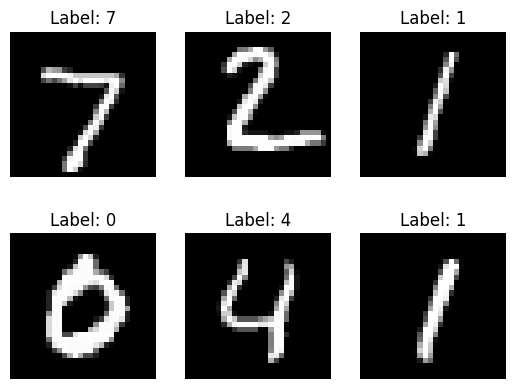

In [4]:
# Visualize some of the data 
# --------------------------------------------------------------
# Excercise 1: Visualize the first 6 images and their labels from the test set
# --------------------------------------------------------------
#TODO
# ---------------------------------------------------------------

### Excersice 2: what is the size of the input images? If we want to use a fully connected layer, what is the size of the input of the fully connected layer?

In [5]:
# Let's define the neural network architecture to learn how to classify the images
import torch.nn as nn

# Define the model 
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.fc1 = nn.Linear(28*28, 128)
        self.fc2 = nn.Linear(128, 64)
        self.fc3 = nn.Linear(64, 10)
        self.relu = nn.ReLU()
        self.logsoftmax = nn.LogSoftmax(dim=1)
        
    def forward(self, x):
        x = x.view(-1, 28*28)
        x = self.relu(self.fc1(x))
        x = self.relu(self.fc2(x))
        x = self.fc3(x)
        return self.logsoftmax(x)

print(Net())

Net(
  (fc1): Linear(in_features=784, out_features=128, bias=True)
  (fc2): Linear(in_features=128, out_features=64, bias=True)
  (fc3): Linear(in_features=64, out_features=10, bias=True)
  (relu): ReLU()
  (logsoftmax): LogSoftmax(dim=1)
)


### Excersice 3: Draw a schematic representation of the model, how many trainable parameters does it have?

In [6]:
# Let's visualize the model graph with tensorboard
from torch.utils.tensorboard import SummaryWriter

writer = SummaryWriter("torchlogs/")
model = Net()
batch_idx, (images, labels) = next(examples)
writer.add_graph(model, images)
writer.close()

## Now let's train the model

In [7]:
# Now let's train the model
import torch.optim as optim

num_epochs = 5  # an epoch is a full pass through the dataset (each step is one batch, once we used all the batches we have completed an epoch)
model = Net()  # init the netwokr
criterion = nn.CrossEntropyLoss()  # define the loss function as the cross entropy loss
optimizer = optim.SGD(model.parameters(), lr=0.01)  # define the optimizer (in this case stochastic gradient descent)

for epoch in range(num_epochs):
    model.train()  # set the model to training mode
    for batch_idx, (images, labels) in enumerate(train_loader):  # Iteare over the batches
        optimizer.zero_grad()  # zero the gradients (otherwise they accumulate)
        output = model(images)  # forward pass (compute the output)
        loss = criterion(output, labels)  # compute the loss    
        loss.backward()  # backward pass (compute the gradients and do backpropagation)
        optimizer.step()  # update the weights (do one step of optimization)

        if batch_idx % 100 == 0:  # print some information every 100 batches
            print('Train Epoch: {} [{}/{} ({:.0f}%)]\tLoss: {:.6f}'.format(
                epoch+1, batch_idx * len(images), len(train_loader.dataset),
                100. * batch_idx / len(train_loader), loss.item()))

Train Epoch: 1 [0/50000 (0%)]	Loss: 2.298582
Train Epoch: 1 [6400/50000 (13%)]	Loss: 2.077154
Train Epoch: 1 [12800/50000 (26%)]	Loss: 1.714908
Train Epoch: 1 [19200/50000 (38%)]	Loss: 1.281494
Train Epoch: 1 [25600/50000 (51%)]	Loss: 0.638875
Train Epoch: 1 [32000/50000 (64%)]	Loss: 0.770361
Train Epoch: 1 [38400/50000 (77%)]	Loss: 0.667440
Train Epoch: 1 [44800/50000 (90%)]	Loss: 0.535242
Train Epoch: 2 [0/50000 (0%)]	Loss: 0.523662
Train Epoch: 2 [6400/50000 (13%)]	Loss: 0.447204
Train Epoch: 2 [12800/50000 (26%)]	Loss: 0.428013
Train Epoch: 2 [19200/50000 (38%)]	Loss: 0.396825
Train Epoch: 2 [25600/50000 (51%)]	Loss: 0.395202
Train Epoch: 2 [32000/50000 (64%)]	Loss: 0.404668
Train Epoch: 2 [38400/50000 (77%)]	Loss: 0.208781
Train Epoch: 2 [44800/50000 (90%)]	Loss: 0.309498
Train Epoch: 3 [0/50000 (0%)]	Loss: 0.406914
Train Epoch: 3 [6400/50000 (13%)]	Loss: 0.319719
Train Epoch: 3 [12800/50000 (26%)]	Loss: 0.325976
Train Epoch: 3 [19200/50000 (38%)]	Loss: 0.402554
Train Epoch: 3 [25

###

### Let's do the same but using tensorboard to visualize the training process.

In [8]:
# Let's repeat the training but using tensorboard to log the loss
writer = SummaryWriter("torchlogs/experiment_ex3")

num_epochs = 5  # an epoch is a full pass through the dataset (each step is one batch, once we used all the batches we have completed an epoch)
model = Net()  # init the netwokr
criterion = nn.CrossEntropyLoss()  # define the loss function as the cross entropy loss
optimizer = optim.SGD(model.parameters(), lr=0.01)  # define the optimizer (in this case stochastic gradient descent)

for epoch in range(num_epochs):
    model.train()  # set the model to training mode
    for batch_idx, (images, labels) in enumerate(train_loader):
        optimizer.zero_grad()  # zero the gradients
        output = model(images)  # forward pass
        loss = criterion(output, labels)  # compute the loss
        loss.backward()  # backward pass
        optimizer.step()  # update the weights

        if batch_idx % 100 == 0:
            writer.add_scalar('training loss', loss.item(), epoch*len(train_loader)+batch_idx)



### Excersice 4: Repeat the training process, but now report the accuracy on the training and the validation set. 

In [11]:
# Let's repeat the training but using tensorboard to log the loss
writer = SummaryWriter("torchlogs/experiment_ex4")

num_epochs = 10  # an epoch is a full pass through the dataset (each step is one batch, once we used all the batches we have completed an epoch)
model = Net()  # init the netwokr
criterion = nn.CrossEntropyLoss()  # define the loss function as the cross entropy loss
optimizer = optim.SGD(model.parameters(), lr=0.01)  # define the optimizer (in this case stochastic gradient descent)

for epoch in range(num_epochs):
    model.train()  # set the model to training mode
    for batch_idx, (images, labels) in enumerate(train_loader):
        optimizer.zero_grad()  # zero the gradients
        output = model(images)  # forward pass
        loss = criterion(output, labels)  # compute the loss
        loss.backward()  # backward pass
        optimizer.step()  # update the weights

        if batch_idx % 1000 == 0:
            writer.add_scalar('training loss', loss.item(), epoch*len(train_loader)+batch_idx)
            # ---------------------------------------------------------------
            # Excercise 4: add two additional scalars to monitor the validation and training accuracy
            #TODO
            # ---------------------------------------------------------------


### Excersice 5: Compare the performance if you use only 100, 500, 1000, 10000, and 50000 samples for training. Do any of this models overfit?
### Excersice 6: Add dropout layers and L2 regularization to avoid overfitting and repeat the previous experiments. Comment on the observed results. 